In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def cargadata(ruta):
    #descarga de datos y limpieza
    df = pd.read_csv(ruta)
    
    
    
    return df

In [10]:
df = cargadata('C:/Users/x/OneDrive/Escritorio/Agus/Henry DATA 02/emissionsmap/documentation/data\primary-sub-energy-source.csv')

In [11]:
df.head(10)

,Entity,Code,Year,Wind Consumption - TWh,Hydro Consumption - TWh,Solar Consumption - TWh,Nuclear Consumption - TWh,Biofuels Consumption - TWh - Total,Geo Biomass Other - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh
0,Africa,NaN,1965,0.0,41.118813,NaN,0.0,NaN,NaN,323.496124,341.262756,9.543755
1,Africa,NaN,1966,0.0,45.862915,NaN,0.0,NaN,NaN,323.122192,369.486572,10.669916
2,Africa,NaN,1967,0.0,47.875538,NaN,0.0,NaN,NaN,330.291565,368.125244,10.545670
3,Africa,NaN,1968,0.0,56.000469,NaN,0.0,NaN,NaN,343.512909,389.199860,10.688970
4,Africa,NaN,1969,0.0,65.352089,NaN,0.0,NaN,NaN,346.642944,396.922852,12.492000
5,Africa,NaN,1970,0.0,81.702881,NaN,0.0,NaN,NaN,360.756897,433.772308,15.520325
6,Africa,NaN,1971,0.0,76.921318,0.0,0.0,NaN,0.164,383.012329,473.565430,18.405264
7,Africa,NaN,1972,0.0,87.625046,0.0,0.0,NaN,0.165,384.210815,510.672638,24.670656
8,Africa,NaN,1973,0.0,92.688919,0.0,0.0,NaN,0.170,408.910339,549.719788,39.551792
9,Africa,NaN,1974,0.0,105.467155,0.0,0.0,NaN,0.175,425.646210,567.799683,44.518486


In [12]:
df.rename(columns={'Entity': 'Country'}, inplace=True)   

In [13]:
df['Country'].unique()

array(['Africa', 'Africa (BP)', 'Algeria', 'Argentina', 'Asia',
       'Asia Pacific (BP)', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'CIS (BP)', 'Canada', 'Central America (BP)', 'Chile', 'China',
       'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Eastern Africa (BP)', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'Europe (BP)', 'European Union (27)', 'Finland', 'France',
       'Germany', 'Greece', 'High-income countries', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Lower-middle-income countries',
       'Luxembourg', 'Malaysia', 'Mexico', 'Middle Africa (BP)',
       'Middle East (BP)', 'Morocco', 'Netherlands', 'New Zealand',
       'Non-OECD (BP)', 'North America', 'North America (BP)',
       'North Macedonia', 'Norway', 'OECD (BP)', 'Oceania', 'Oman',
     

In [14]:
df['Code'].unique()

array([nan, 'DZA', 'ARG', 'AUS', 'AUT', 'AZE', 'BGD', 'BLR', 'BEL', 'BRA',
       'BGR', 'CAN', 'CHL', 'CHN', 'COL', 'HRV', 'CYP', 'CZE', 'DNK',
       'ECU', 'EGY', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JPN',
       'KAZ', 'KWT', 'LVA', 'LTU', 'LUX', 'MYS', 'MEX', 'MAR', 'NLD',
       'NZL', 'MKD', 'NOR', 'OMN', 'PAK', 'PER', 'PHL', 'POL', 'PRT',
       'QAT', 'ROU', 'RUS', 'SAU', 'SGP', 'SVK', 'SVN', 'ZAF', 'KOR',
       'ESP', 'LKA', 'SWE', 'CHE', 'TWN', 'THA', 'TTO', 'TUR', 'TKM',
       'OWID_USS', 'UKR', 'ARE', 'GBR', 'USA', 'UZB', 'VEN', 'VNM',
       'OWID_WRL'], dtype=object)

In [15]:
# Número de valores únicos en cada variable
for var in df:
    print(f'{var}: {df[var].nunique()}')

Country: 114
Code: 81
Year: 57
Wind Consumption - TWh: 2321
Hydro Consumption - TWh: 5311
Solar Consumption - TWh: 2032
Nuclear Consumption - TWh: 2206
Biofuels Consumption - TWh - Total: 955
Geo Biomass Other - TWh: 3225
Coal Consumption - TWh: 5480
Oil Consumption - TWh: 6092
Gas Consumption - TWh: 5394


In [16]:
print('Numero de duplicados: {}'.format(len(df[df.duplicated()])))

Numero de duplicados: 0


#### Valores faltantes

In [17]:
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
Code: 1861
Year: 0
Wind Consumption - TWh: 221
Hydro Consumption - TWh: 7
Solar Consumption - TWh: 236
Nuclear Consumption - TWh: 536
Biofuels Consumption - TWh - Total: 4576
Geo Biomass Other - TWh: 212
Coal Consumption - TWh: 26
Oil Consumption - TWh: 0
Gas Consumption - TWh: 66


In [18]:
def calidaDato (data):
    df = data
    calidad = []
    mascara = df.isna().sum()
    for i in range(0,len(mascara)):
        p = (df.shape[0]- mascara[i]) / df.shape[0]
        calidad.append([mascara.index[i], round((p*100),2)])
   
    calidad = pd.DataFrame(calidad)
    calidad.rename(columns={0:'Columna', 1: 'Calida %'}, inplace=True)
    
    return calidad

In [19]:
dataprueba = calidaDato(df)

In [20]:
import missingno as msno


,Columna,Calida %
0,Country,100.00
1,Code,69.79
2,Year,100.00
3,Wind Consumption - TWh,96.41
4,Hydro Consumption - TWh,99.89
5,Solar Consumption - TWh,96.17
6,Nuclear Consumption - TWh,91.30
7,Biofuels Consumption - TWh - Total,25.71
8,Geo Biomass Other - TWh,96.56
9,Coal Consumption - TWh,99.58


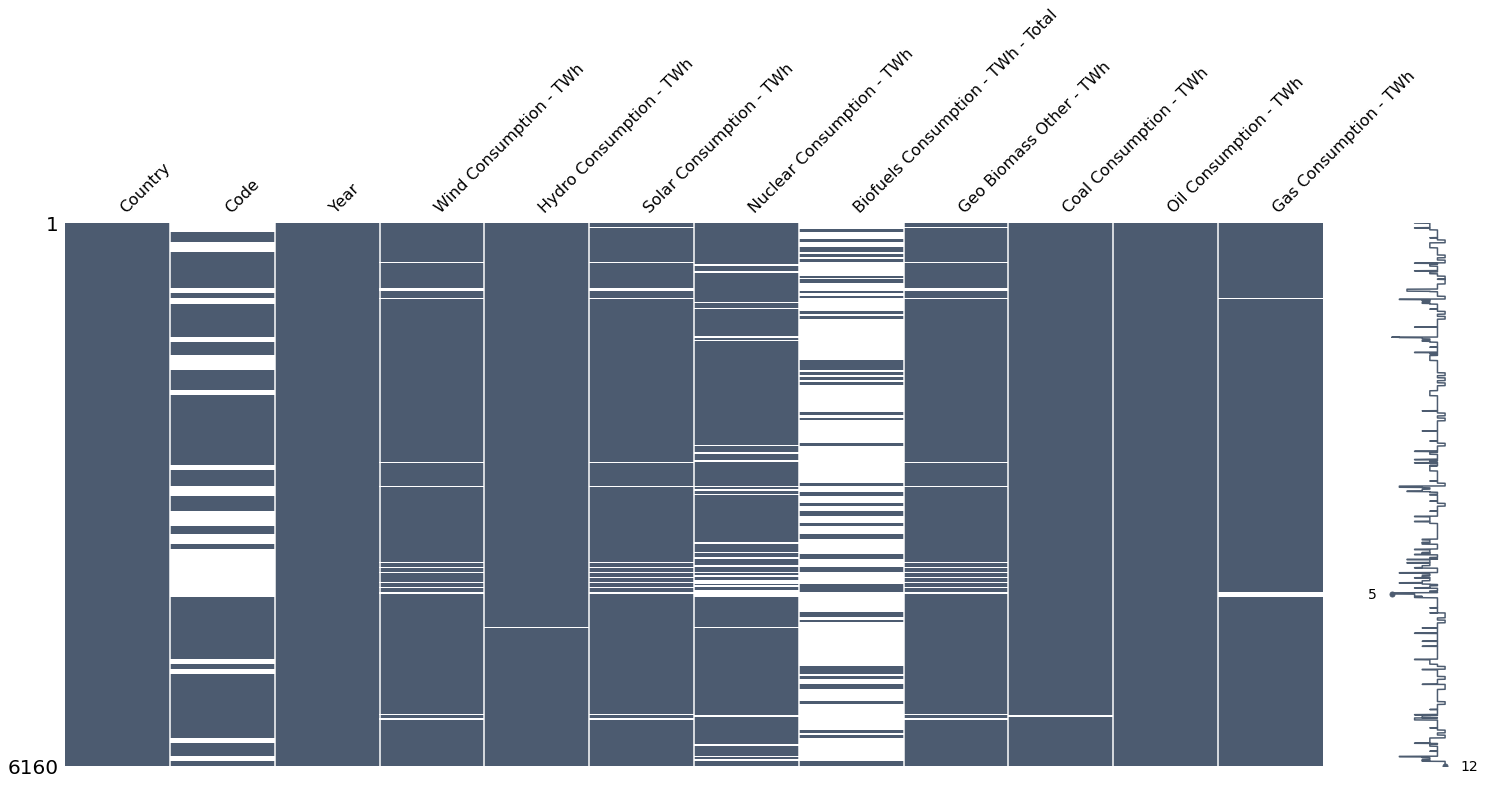

In [21]:
msno.matrix(df,color=(0.3,0.36,0.44))
dataprueba

Mirando más a fondo los valores del PIB de los años 1970

In [22]:
temp_pop = pd.DataFrame(df[df['Biofuels Consumption - TWh - Total'].isnull()])
cont = temp_pop['Country'].unique()

print(cont)

['Africa' 'Africa (BP)' 'Algeria' 'Argentina' 'Asia' 'Australia' 'Austria'
 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria'
 'CIS (BP)' 'Canada' 'Central America (BP)' 'Chile' 'China' 'Colombia'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Eastern Africa (BP)' 'Ecuador'
 'Egypt' 'Estonia' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'High-income countries' 'Hong Kong' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kazakhstan'
 'Kuwait' 'Latvia' 'Lithuania' 'Lower-middle-income countries'
 'Luxembourg' 'Malaysia' 'Mexico' 'Middle Africa (BP)' 'Middle East (BP)'
 'Morocco' 'Netherlands' 'New Zealand' 'North America'
 'North America (BP)' 'North Macedonia' 'Norway' 'Oceania' 'Oman'
 'Other Africa (BP)' 'Other CIS (BP)' 'Other Caribbean (BP)'
 'Other Middle East (BP)' 'Other Northern Africa (BP)'
 'Other South America (BP)' 'Other Southern Africa (BP)' 'Pakistan' 'Peru'
 'Philippines' 'Portugal' 'Qatar' 'Romania' 'Russia' 'Saudi 

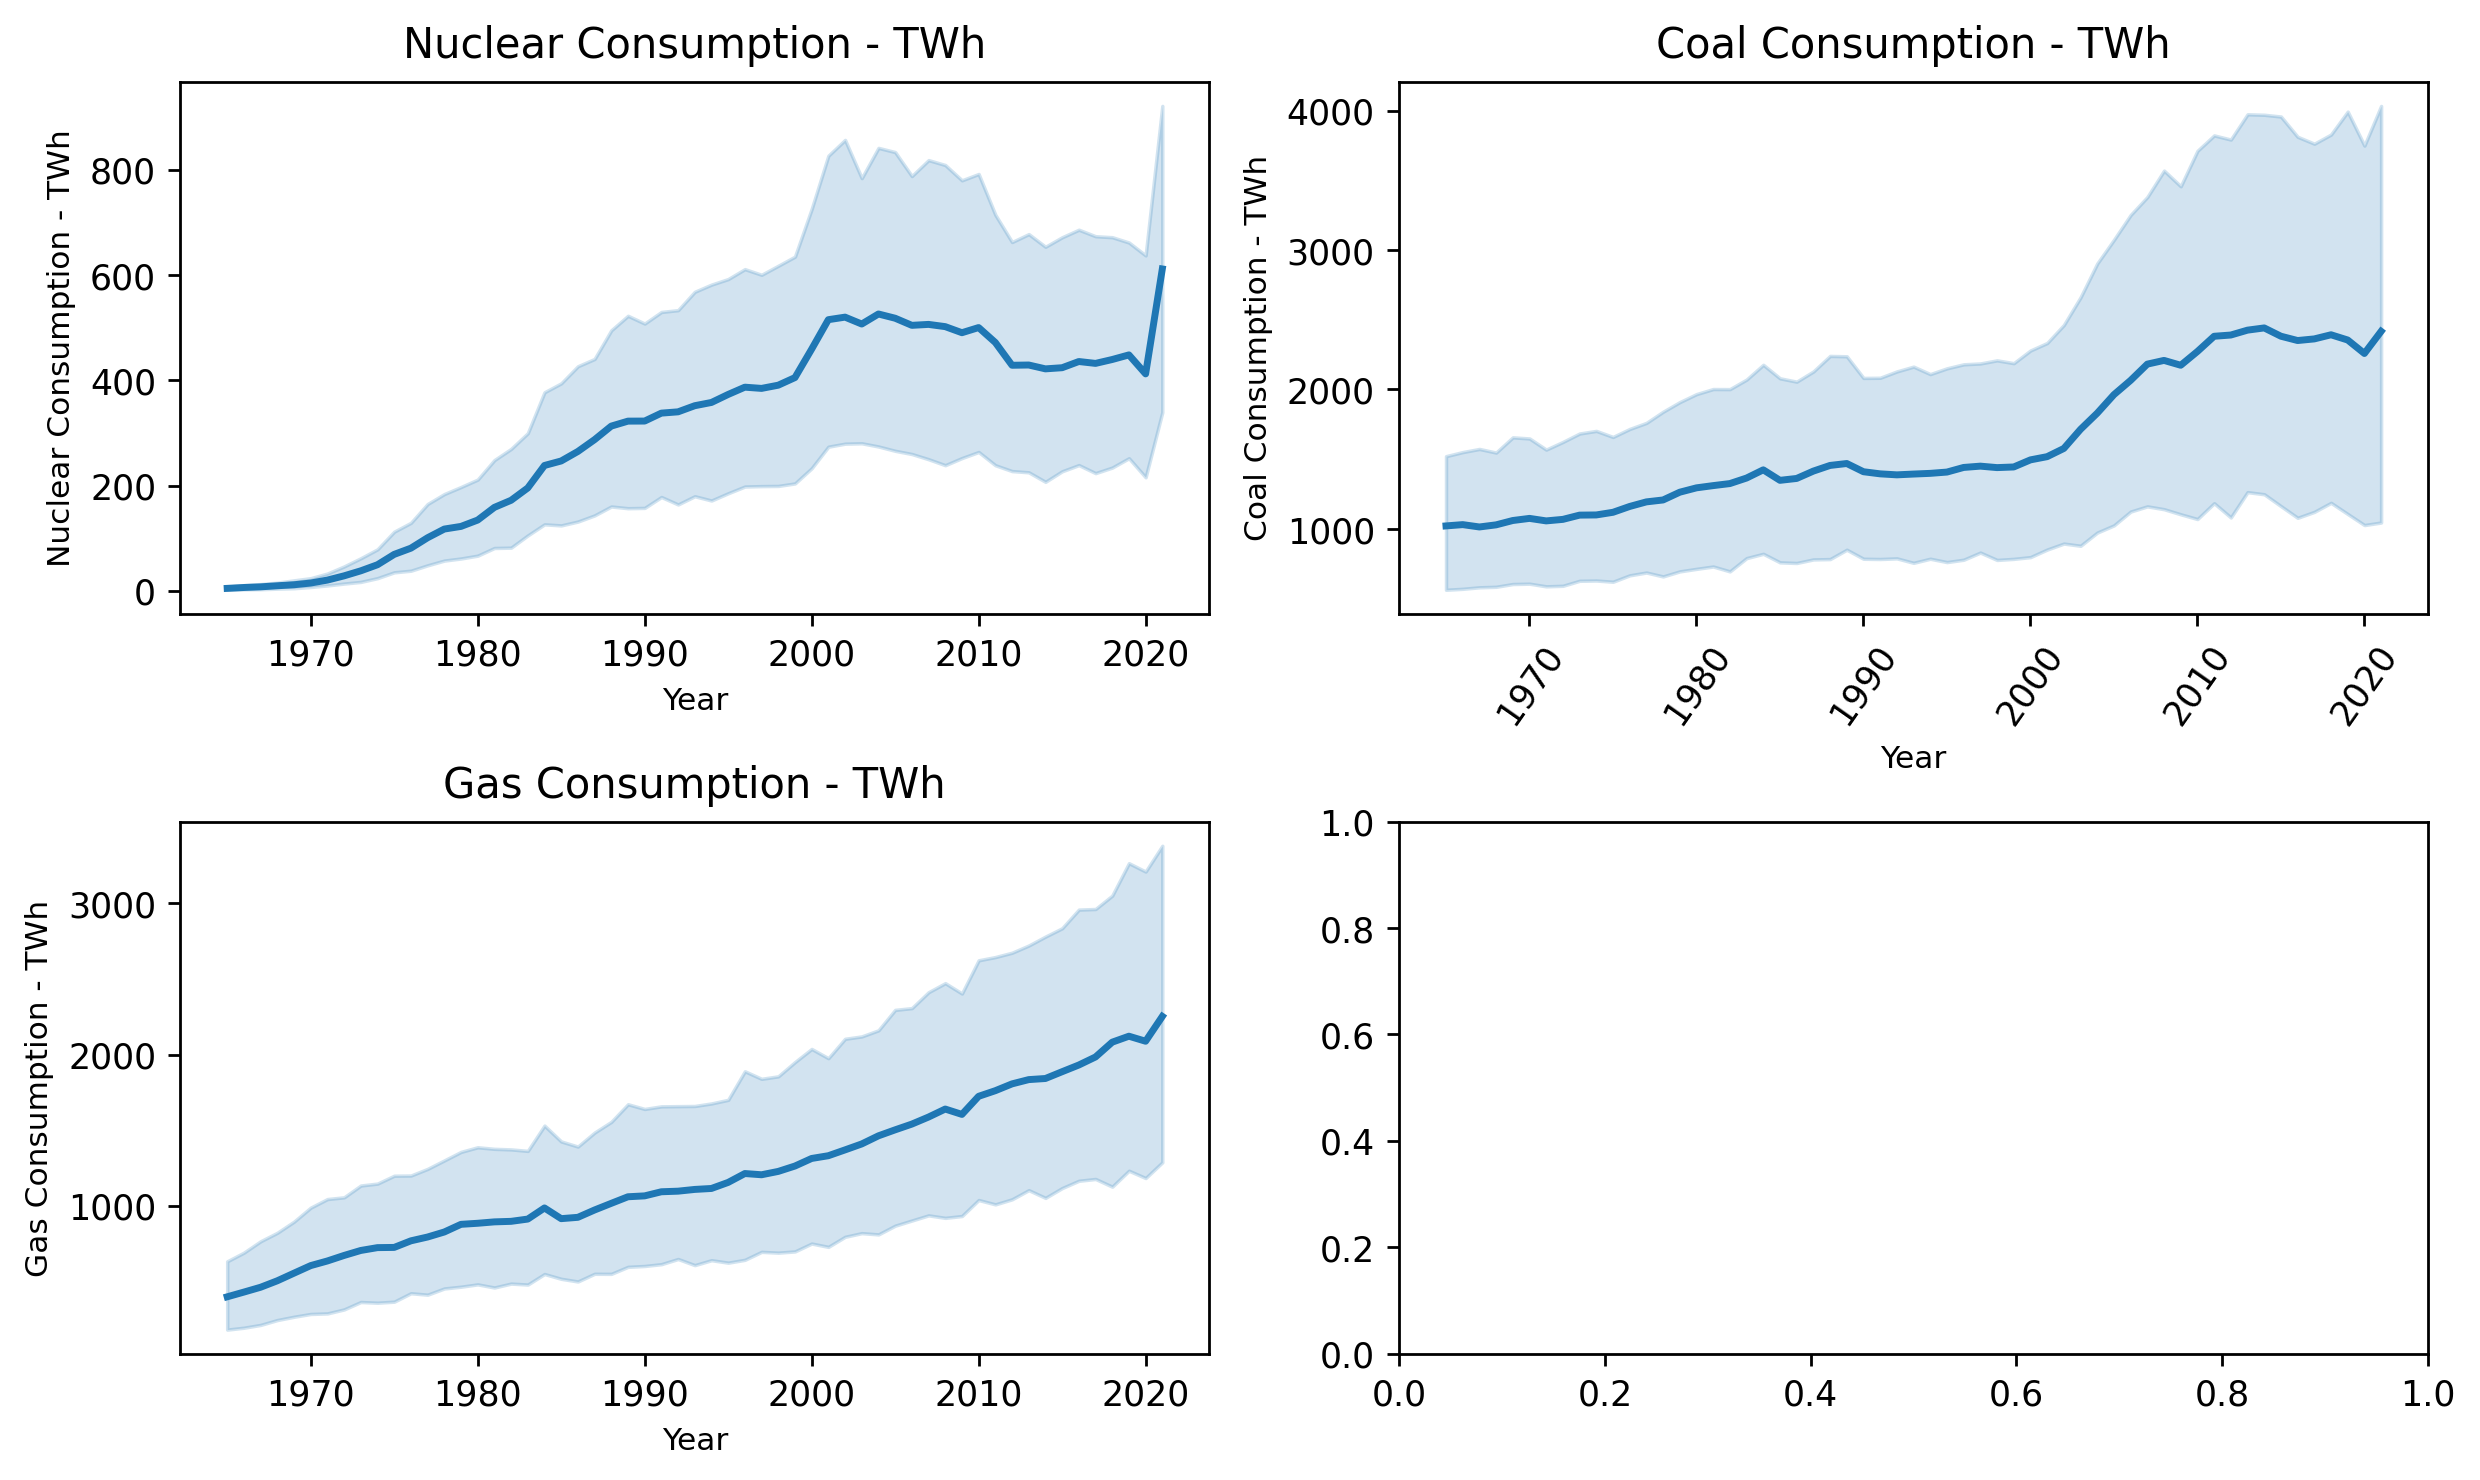

In [23]:
with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 9,
                          'xtick.labelsize': 10, 'ytick.labelsize': 10,
                          'legend.title_fontsize': 7, 'axes.titlesize': 12,
                          'axes.titlepad': 7}):


    
    
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), # constrained_layout = True,
                               gridspec_kw = {'width_ratios': [3, 3], 
                                                'height_ratios': [3, 3]})
    
    ax_flat = ax_4.flatten()
    
    ### 1er gráfico
    sns.lineplot(ax=ax_flat[0], data=df,
             x='Year', y='Nuclear Consumption - TWh', lw=2
            ).set_title('Nuclear Consumption - TWh')

    ### 2nd gráfico
    sns.lineplot(ax=ax_flat[1], data=df,
                x='Year', y='Coal Consumption - TWh', lw=2
               ).set_title('Coal Consumption - TWh')
    ax_flat[1].tick_params(axis='x', rotation=55)
    
     ### 3rd gráfico
    sns.lineplot(ax=ax_flat[2], data=df,
                x='Year', y='Gas Consumption - TWh', lw=2
               ).set_title('Gas Consumption - TWh')
    
   
    
    
    #sns.lineplot(ax=ax_flat[3], data=p,
    #            x='e_con', y='ei_gdp', lw=2
    #           ).set_title('Relationship of ei_gdp and world energy con')

    
    plt.tight_layout(pad = 1)
    plt.show()

In [24]:
mundo = df[df['Code']=='OWID_WRL']

In [25]:
fig1 = px.line(mundo, x='Year', y="Nuclear Consumption - TWh", color="Code",title='Consumo de Nuclear Consumption - TWh ')
fig1.show()

In [34]:
fig1 = px.line(mundo, x='Year', y="Wind Consumption - TWh", color="Code",title='Wind Consumption - TWh')
fig1.show()

In [26]:
mundo = df[df['Code']!='OWID_WRL']

In [27]:
mundo 

,Country,Code,Year,Wind Consumption - TWh,Hydro Consumption - TWh,Solar Consumption - TWh,Nuclear Consumption - TWh,Biofuels Consumption - TWh - Total,Geo Biomass Other - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh
0,Africa,NaN,1965,0.000000,41.118813,NaN,0.0,NaN,NaN,323.496124,341.262756,9.543755
1,Africa,NaN,1966,0.000000,45.862915,NaN,0.0,NaN,NaN,323.122192,369.486572,10.669916
2,Africa,NaN,1967,0.000000,47.875538,NaN,0.0,NaN,NaN,330.291565,368.125244,10.545670
3,Africa,NaN,1968,0.000000,56.000469,NaN,0.0,NaN,NaN,343.512909,389.199860,10.688970
4,Africa,NaN,1969,0.000000,65.352089,NaN,0.0,NaN,NaN,346.642944,396.922852,12.492000
...,...,...,...,...,...,...,...,...,...,...,...,...
6098,Western Africa (BP),NaN,2017,0.472493,49.798744,0.859688,NaN,NaN,0.316682,7.843330,377.442932,220.183716
6099,Western Africa (BP),NaN,2018,0.502948,52.793194,1.675828,NaN,NaN,0.216594,9.002492,434.532440,235.207291
6100,Western Africa (BP),NaN,2019,0.606558,59.361206,2.101726,NaN,NaN,0.251494,8.791768,442.070068,241.824905
6101,Western Africa (BP),NaN,2020,1.089399,58.433865,2.176087,NaN,NaN,0.247744,7.973295,436.522675,258.820496


In [28]:
fig1 = px.line(mundo, x='Year', y="Nuclear Consumption - TWh", color="Code",title='Consumo de Nuclear Consumption - TWh ')
fig1.show()

In [29]:
choro_map=px.choropleth(df, 
                    locations="Code", 
                    locationmode = "ISO-3",
                    color="Nuclear Consumption - TWh", 
                    hover_name="Code"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
choro_map.show()